### Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [6]:
iris = pd.read_csv("Iris.csv")

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Dropping the column

In [9]:
iris.drop("Id", axis=1, inplace = True)

### Performing EDA

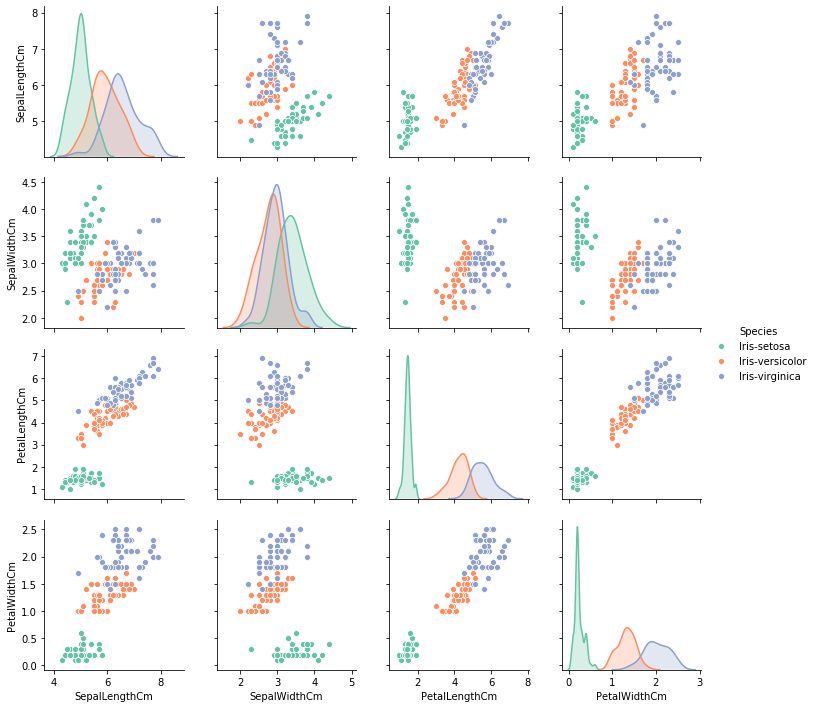

In [15]:
sns.pairplot(data=iris,hue="Species",palette="Set2")
plt.show()

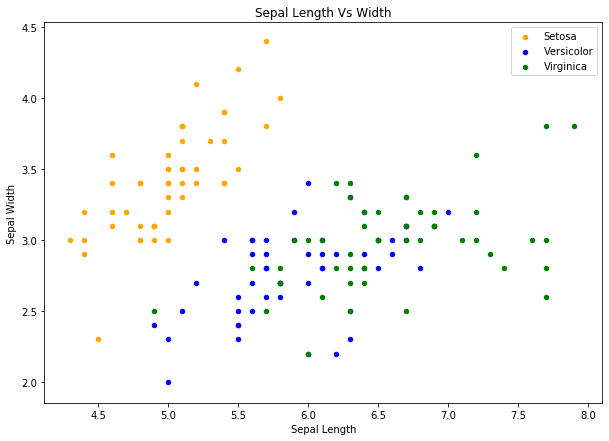

In [11]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

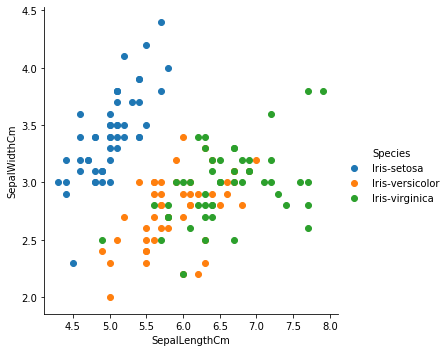

In [12]:
sns.FacetGrid(iris, hue='Species', size=5)\
   .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')\
   .add_legend()

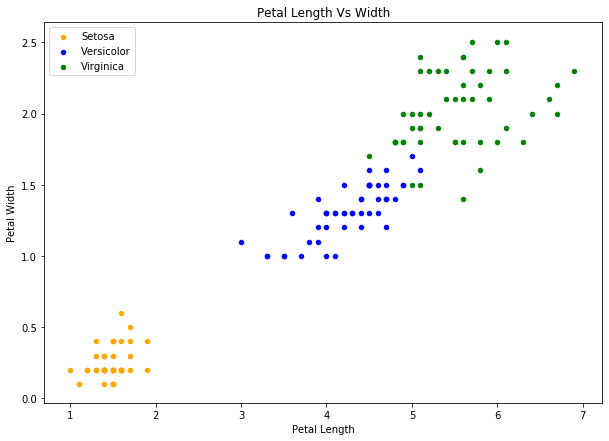

In [13]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

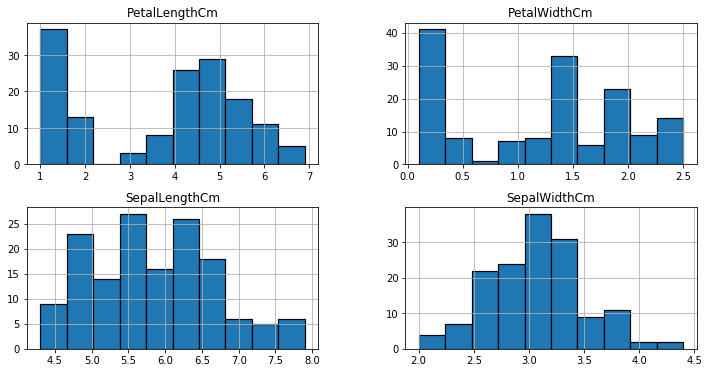

In [14]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

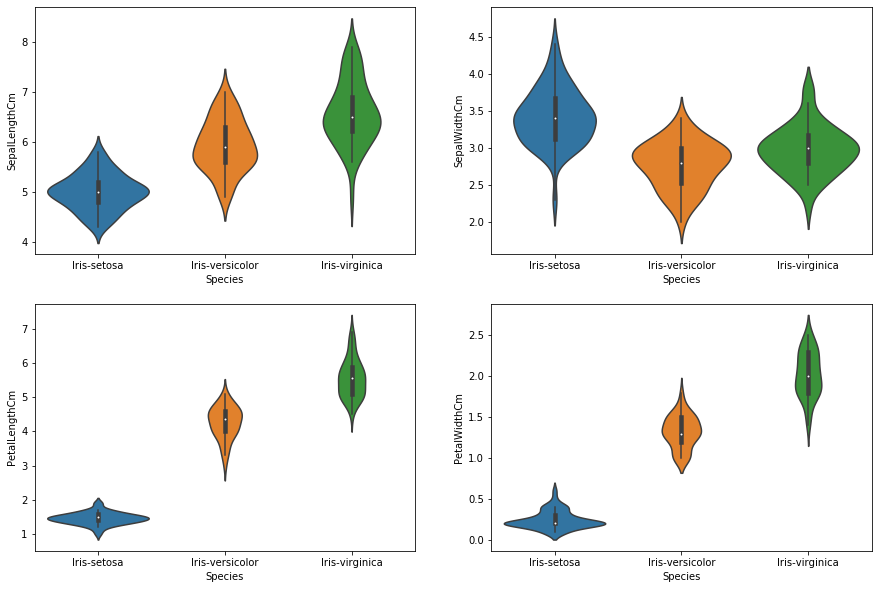

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=iris)

### Now the given problem is a classification problem.. Thus we will be using the Decision tree algorithm to build a model.

### Splitting The Data into Training And Testing Dataset

In [51]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree,export_text

In [52]:
train, test = train_test_split(iris, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [53]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data feature
test_y = test.Species # output value of the test data

In [54]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
144,6.7,3.3,5.7,2.5
87,6.3,2.3,4.4,1.3
57,4.9,2.4,3.3,1.0
102,7.1,3.0,5.9,2.1
49,5.0,3.3,1.4,0.2


In [55]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
103,6.3,2.9,5.6,1.8
16,5.4,3.9,1.3,0.4
101,5.8,2.7,5.1,1.9
111,6.4,2.7,5.3,1.9
59,5.2,2.7,3.9,1.4


In [56]:
train_y.head()

144     Iris-virginica
87     Iris-versicolor
57     Iris-versicolor
102     Iris-virginica
49         Iris-setosa
Name: Species, dtype: object

In [57]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.9777777777777777


[Text(295.4117647058824, 524.1857142857143, 'SepalWidthCm <= 5.45\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]\nclass = Iris-versicolor'),
 Text(118.16470588235295, 485.3571428571429, 'SepalLengthCm <= 2.75\ngini = 0.207\nsamples = 35\nvalue = [31, 3, 1]\nclass = Iris-setosa'),
 Text(78.7764705882353, 446.52857142857147, 'SepalWidthCm <= 4.7\ngini = 0.56\nsamples = 5\nvalue = [1, 3, 1]\nclass = Iris-virginica'),
 Text(39.38823529411765, 407.70000000000005, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Iris-setosa'),
 Text(118.16470588235295, 407.70000000000005, 'SepalLengthCm <= 2.45\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]\nclass = Iris-virginica'),
 Text(78.7764705882353, 368.8714285714286, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = Iris-virginica'),
 Text(157.5529411764706, 368.8714285714286, 'SepalWidthCm <= 5.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-virginica'),
 Text(118.16470588235295, 330.0428571428572, 'gini = 0.0\nsamples = 1\nva

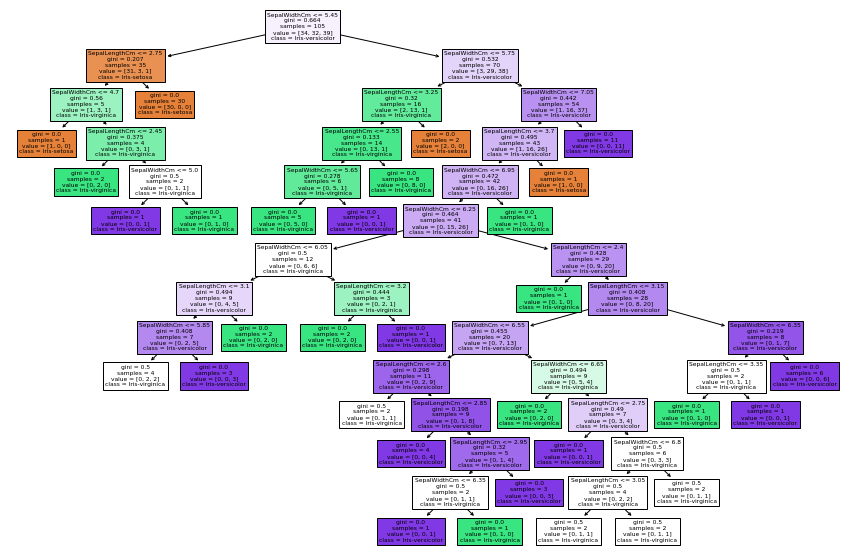

In [71]:
features  = test_X.columns
classes=["Iris-setosa","Iris-virginica","Iris-versicolor"]
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=features,class_names=classes,filled = True)

## THANKYOU